# 鐵達尼生存預測
https://www.kaggle.com/c/titanic

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier

## 讀取csv

In [2]:
df_train = pd.read_csv('./data/' + 'titanic_train.csv')
df_test = pd.read_csv('./data/' + 'titanic_test.csv')

## 快速查看資料
- PassengerId: 乘客編號
- Survived: 乘客是否存活（1代表存活，0代表死亡）
- Pclass: 艙位是頭等艙、二等艙還是三等艙
- Name: 乘客姓名
- Sex: 乘客的性別
- Age: 乘客的年齡
- SibSp: 在鐵達尼號上兄弟姐妹或者配偶的人數
- Parch: 在鐵達尼號上父母或者子女的人數
- Ticket: 乘客的船票號碼
- Fare: 買的船票價格
- Cabin: 在船上住的房間編號
- Embarked: 在英國哪個港口上的船

In [3]:
print(df_train.shape)
df_train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(df_test.shape)
df_test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 取出/移除目標欄位

In [5]:
Y_train = df_train['Survived']

df_train = df_train.drop(['Survived'] , axis=1) # 移除欄位

ids = df_test['PassengerId']

## 合併df_train、df_test

In [6]:
df = pd.concat([df_train,df_test])
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(df.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


## 填補缺失值
## 編碼
## 歸一化

In [8]:
# 眾數(Mode)、中位數(Median)、和算術平均數(Mean)

df['Age'].fillna(df['Age'].median(), inplace = True)

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

df['Fare'].fillna(df['Fare'].median(), inplace = True)

print(df.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
dtype: int64


In [9]:
df['Family_Size'] = df['Parch'] + df['SibSp']
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [10]:
print(df.isnull().sum())

PassengerId       0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          0
Family_Size       0
dtype: int64


In [11]:
def get_is_alone(row):
    if row > 0:
        return 0
    else:
        return 1

df['IsAlone'] = df['Family_Size'].apply(get_is_alone)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,IsAlone
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [12]:
def get_title(row):
    if 'Miss' in row:
        return 'Miss'
    elif 'Mrs' in row:
        return 'Mrs'
    elif 'Master' in row:
        return 'Master'
    elif 'Mr' in row:
        return 'Mr'
    else:
        return 'Misc'

df['Title'] = df['Name'].apply(get_title)
print(df['Title'].value_counts())
df.head()

Mr        758
Miss      260
Mrs       199
Master     61
Misc       31
Name: Title, dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,IsAlone,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,Mrs
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,Mr


In [13]:
df_embarked = pd.get_dummies(df['Sex'], prefix='Sex')
df_embarked
print(df_embarked.head())

df = pd.concat([df, df_embarked], axis=1);
df = df.drop(['Sex'] , axis=1)
df.head()

   Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1


,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_Size,IsAlone,Title,Sex_female,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,Mr,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,1,0,Mrs,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,Miss,1,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,1,0,Mrs,1,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,Mr,0,1


In [14]:
df = pd.concat([df.drop(['Embarked'], axis=1), pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1);
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,IsAlone,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,Mr,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,Mrs,1,0,1,0,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1,Miss,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,Mrs,1,0,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,Mr,0,1,0,0,1


In [15]:
df = pd.concat([df.drop(['Title'], axis=1), pd.get_dummies(df['Title'], prefix='Title')], axis=1);
df.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Family_Size,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,...,0,1,0,0,1,0,0,0,1,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,...,1,0,1,0,0,0,0,0,0,1
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,...,1,0,0,0,1,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,...,1,0,0,0,1,0,0,0,0,1
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,0,1,0,0,1,0,0,0,1,0


In [16]:
# df['FareBin'] = pd.qcut(df['Fare'], 4)

# df['AgeBin'] = pd.cut(df['Age'].astype(int), 5)

# df.head()

## 移除特徵欄位（太多缺失值、不需要）

In [17]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(col)
        print(df[col].value_counts())
        print()

Name
Connolly, Miss. Kate                                    2
Kelly, Mr. James                                        2
Landergren, Miss. Aurora Adelia                         1
Lefebre, Miss. Jeannie                                  1
Becker, Miss. Marion Louise                             1
Oreskovic, Mr. Luka                                     1
Andersson, Miss. Sigrid Elisabeth                       1
Beane, Mr. Edward                                       1
Blank, Mr. Henry                                        1
Weir, Col. John                                         1
Douglas, Mrs. Frederick Charles (Mary Helene Baxter)    1
Gustafsson, Mr. Karl Gideon                             1
Carbines, Mr. William                                   1
Harder, Mrs. George Achilles (Dorothy Annan)            1
Ekstrom, Mr. Johan                                      1
Quick, Miss. Winifred Vera                              1
Thomas, Mr. Tannous                                     1
Kimball, 

In [18]:
df.drop(['PassengerId'] , axis=1, inplace=True)
df.drop(['Cabin'], axis=1, inplace=True)
df.drop(['Name'], axis=1, inplace=True)
df.drop(['Ticket'], axis=1, inplace=True)
df.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,1,0,1,0,0,0,0,0,0,1
2,3,26.0,0,0,7.9250,0,1,1,0,0,0,1,0,0,1,0,0
3,1,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,1,0,0,1,0,0,0,1,0


In [19]:
MMEncoder = MinMaxScaler()
for c in df.columns:
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))
df.head()

,Pclass,Age,SibSp,Parch,Fare,Family_Size,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,1.0,0.273456,0.125,0.0,0.014151,0.1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.473882,0.125,0.0,0.139136,0.1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.323563,0.000,0.0,0.015469,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.436302,0.125,0.0,0.103644,0.1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.436302,0.000,0.0,0.015713,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


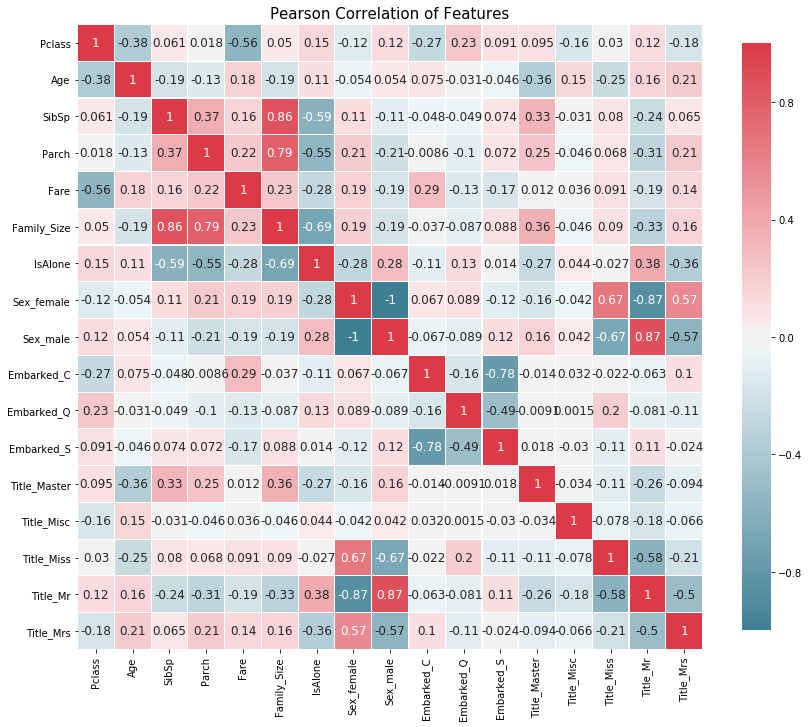

In [20]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

## 取得X_train、y_train

In [21]:
train_num = Y_train.shape[0]
X_train = df[:train_num]
X_test = df[train_num:]

## 訓練模型

In [22]:
model = XGBClassifier()
model.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## 特徵重要性

In [23]:
importance = pd.Series(data=model.feature_importances_, index=X_train.columns)
importance = importance.sort_values(ascending=False)
print(importance)

Sex_female      0.420233
Title_Mr        0.190508
Pclass          0.109069
SibSp           0.068821
Title_Master    0.062512
Embarked_S      0.037103
Family_Size     0.031812
Fare            0.027783
Age             0.017010
Embarked_C      0.014253
Title_Mrs       0.009252
Parch           0.006598
Title_Misc      0.005045
IsAlone         0.000000
Embarked_Q      0.000000
Title_Miss      0.000000
Sex_male        0.000000
dtype: float32


## 預測X_test

In [24]:
# pred = model.predict_proba(X_test)
pred = model.predict(X_test)
sub = pd.DataFrame({'PassengerId': ids, 'Survived': pred})
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## 儲存預測數據

In [25]:
sub.to_csv('titanic_baseline.csv', index=False) 

## 使用神經網路作為model

In [26]:
import os
import pandas as pd
from pandas import DataFrame
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout  
from keras.optimizers import Adam
from keras.layers import BatchNormalization
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
np.random.seed(1)

Using TensorFlow backend.


In [27]:
model = Sequential()  
model.add(Dense(units=40, input_dim=len(df.columns), activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=40, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  
# model.summary()  

model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])  

W0711 20:50:57.497242 4561397184 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0711 20:50:57.510108 4561397184 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0711 20:50:57.512090 4561397184 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0711 20:50:57.557881 4561397184 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use

In [28]:
train_history = model.fit(x=X_train, y=Y_train, validation_split=0.1, epochs=50, batch_size=30)  

W0711 20:50:57.678077 4561397184 deprecation_wrapper.py:119] From /Users/ianfan/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 801 samples, validate on 90 samples
Epoch 1/50
801/801 [==============================] - 0s 320us/step - loss: 0.6116 - acc: 0.7453 - val_loss: 0.5470 - val_acc: 0.7222
Epoch 2/50
801/801 [==============================] - 0s 36us/step - loss: 0.5112 - acc: 0.7903 - val_loss: 0.4818 - val_acc: 0.7667
Epoch 3/50
801/801 [==============================] - 0s 32us/step - loss: 0.4716 - acc: 0.7903 - val_loss: 0.4452 - val_acc: 0.7889
Epoch 4/50
801/801 [==============================] - 0s 31us/step - loss: 0.4517 - acc: 0.8015 - val_loss: 0.4246 - val_acc: 0.8111
Epoch 5/50
801/801 [==============================] - 0s 30us/step - loss: 0.4384 - acc: 0.8190 - val_loss: 0.3957 - val_acc: 0.8333
Epoch 6/50
801/801 [==============================] - 0s 28us/step - loss: 0.4259 - acc: 0.8227 - val_loss: 0.3796 - val_acc: 0.8444
Epoch 7/50
801/801 [==============================] - 0s 28us/step - loss: 0.4177 - acc: 0.8277 - val_loss: 0.3699 - val_acc: 0.8667
Epoch 8/50
801/801 [===

In [29]:
pred = model.predict(X_test)
print(pred[:5])
pred = pred.reshape(-1)
print(pred[:5])
print(pred.shape)
sub = pd.DataFrame({'PassengerId': ids, 'Survived': pred})
sub.head()

[[0.05046809]
 [0.25962013]
 [0.04557091]
 [0.10069969]
 [0.40341377]]
[0.05046809 0.25962013 0.04557091 0.10069969 0.40341377]
(418,)


,PassengerId,Survived
0,892,0.050468
1,893,0.259620
2,894,0.045571
3,895,0.100700
4,896,0.403414


In [30]:
sub['Survived'] = sub['Survived'].map(lambda x: 1 if float(x)>=0.5 else 0)
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [31]:
sub.to_csv('titanic_baseline_nn.csv', index=False) 